# Swedish Auto Insurance

In [2]:
#import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
sns.set()

In [3]:
##set the working directory
os.chdir("C:/Users/Aurangzeb Alam/Desktop\DataSet/1. www.machinelearningmastery.com/1. Swedish Auto Insurance Dataset/Me")

In [4]:
#check the working Directory
os.getcwd()

'C:\\Users\\Aurangzeb Alam\\Desktop\\DataSet\\1. www.machinelearningmastery.com\\1. Swedish Auto Insurance Dataset\\Me'

In [5]:
#Load the data
Dua = pd.read_csv("Insurance.csv")

In [6]:
#Head of the data
Dua.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [7]:
Dua.shape

(63, 2)

In [8]:
#Check the missing values
missing_value = pd.DataFrame(Dua.isnull().sum())
missing_value

,0
X,0
Y,0


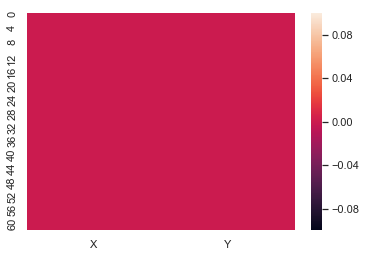

In [9]:
# Plot histogram to see the missing values
sns.heatmap(Dua.isnull(),cbar=True)

In [10]:
# Info of the Dataset
Dua.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
X    63 non-null int64
Y    63 non-null float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [11]:
# Statistical details
Dua.describe()

,X,Y
count,63.000000,63.000000
mean,22.904762,98.187302
std,23.351946,87.327553
min,0.000000,0.000000
25%,7.500000,38.850000
50%,14.000000,73.400000
75%,29.000000,140.000000
max,124.000000,422.200000


In [12]:
#Total columns
Dua.columns

Index(['X', 'Y'], dtype='object')

In [13]:
#Numerical columns
Numerical_columns = Dua.select_dtypes(include=[np.number]).columns.tolist()
Numerical_columns

['X', 'Y']

In [14]:
#Categorical columns
Categorical_columns = Dua.select_dtypes(exclude=[np.number]).columns.tolist()
Categorical_columns

[]

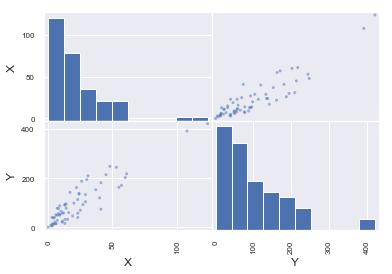

In [15]:
# Multivariate plots to better understand the relationships between attributes
#scatter plot matrix
from pandas.plotting import scatter_matrix
scatter_matrix(Dua)
plt.show()

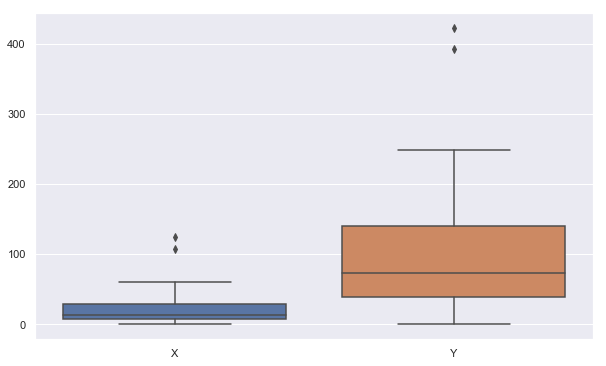

In [16]:
#plot boxplot to see the outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=Dua)

In [17]:
#Detect and delete outliers from data
for i in Numerical_columns:
    print(i)
    q75, q25 = np.percentile(Dua.loc[:,i], [75 ,25])
    iqr = q75 - q25

    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print(min)
    print(max)
    
    Dua = Dua.drop(Dua[Dua.loc[:,i] < min].index)
    Dua = Dua.drop(Dua[Dua.loc[:,i] > max].index)

X
-24.75
61.25
Y
-107.10000000000002
280.1


In [18]:
#Check the shape of data
Dua.shape

(61, 2)

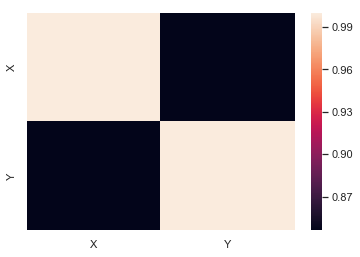

In [19]:
#Plot correlation plot
sns.heatmap(Dua.corr())

In [20]:
#Splitting Data into X and Y
x = Dua.iloc[:, :-1].values
y = Dua.iloc[:, 1].values

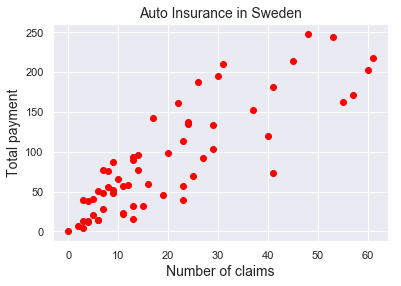

In [21]:
# check the linearity between X and y
plt.scatter(x, y,color='red')
plt.title('Auto Insurance in Sweden', fontsize=14)
plt.xlabel('Number of claims', fontsize=14)
plt.ylabel('Total payment', fontsize=14)
plt.grid(True)
plt.show()

In [22]:
# Splitting Data into training and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =  0.2, random_state = 0)

In [23]:
# Training Linear Regression Mode
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)
y_prediction = linear_regression.predict(x_test)
y_prediction

array([ 46.67314021,  63.76236001, 111.61217544,  22.7482325 ,
       101.35864356, 159.46199087, 231.23671401, 203.89396233,
       162.87983482, 121.86570731, 101.35864356,  60.34451605,
        43.25529625])

In [24]:
RMSE = np.sqrt(metrics.mean_squared_error(y_prediction,y_test))
print("RMSE for Testing set:",RMSE)

RMSE for Testing set: 37.967857082062224


In [25]:
#the command .score(X_test,y_test) used to determine the accuracy
accuracy_train=linear_regression.score(x_train,y_train)
print("Accuracy for Training set:",accuracy_train)

# the command .score(X_test,y_test) to determine his model accuracy
accuracy_test=linear_regression.score(x_test,y_test)
print ("Accuracy for Testing set :",accuracy_test)

Accuracy for Training set: 0.6815601167004981
Accuracy for Testing set : 0.7794048563777379
